<a href="https://colab.research.google.com/github/jyothi8203/cvision_learning/blob/main/phycv_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PhyCV Colab Demo

[Installation](#scrollTo=3yuw3uarME8o)

[Basic Usage](#scrollTo=HydY9J_RzUP6)

> [VEViD for Low-light Enhancement](#scrollTo=6saTpSFxURub)

> [VEViD for Color Enhancement](#scrollTo=NUrtTptKXNRs)

> [VEViD for Video Enhancement](#scrollTo=6xG7F8uiZ-t4)

> [PST for Edge Detection](#scrollTo=Qx6r3I6pRjB0)

> [PAGE for Directional Edge Detection](#scrollTo=MpJfIeTHSPc-)





# Installation

In [ ]:
!git clone https://github.com/JalaliLabUCLA/phycv.git
%cd /content/phycv
!pip install -e .

Cloning into 'phycv'...
remote: Enumerating objects: 377, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 377 (delta 59), reused 55 (delta 30), pack-reused 274
Receiving objects: 100% (377/377), 76.81 MiB | 12.91 MiB/s, done.
Resolving deltas: 100% (184/184), done.
/content/phycv
Obtaining file:///content/phycv
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.7/705.7 kB 43.2 MB/s eta 0:00:00
  Running setup.py develop for phycv


# Basic Usage

## VEViD for Low-light Enhancement

Text(0.5, 1.0, 'PhyCV Low-Light Enhancement (VEViD-Lite)')

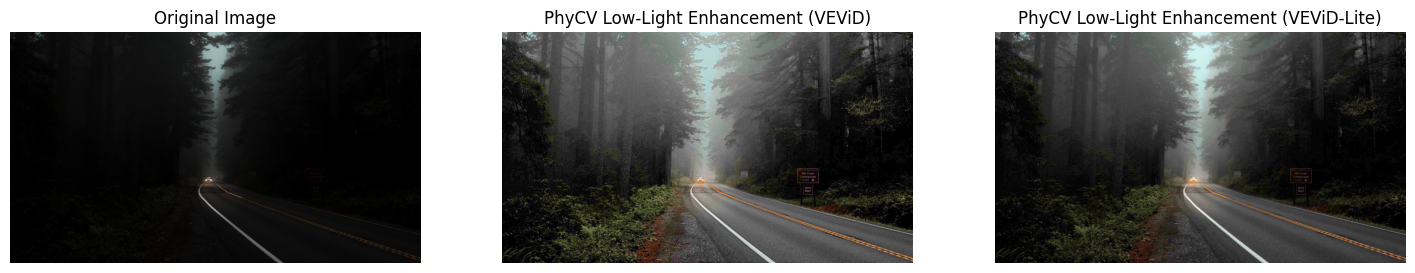

In [ ]:
import os

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import torch

from phycv import VEVID

# you can change this to your own image
img_file = './assets/input_images/dark_road.jpeg'
original_image = mpimg.imread(img_file)

# VEViD parameters
S = 0.4
T = 0.001
b = 0.25
G = 0.8

# run VEVID
vevid = VEVID()
vevid_output = vevid.run(img_file=img_file, S=S, T=T, b=b, G=G)

# run VEViD-Lite
vevid_lite_output = vevid.run_lite(img_file=img_file, b=b, G=G)

# visualize the results
f, axes = plt.subplots(1, 3, figsize=(18, 8))
axes[0].imshow(original_image)
axes[0].axis("off")
axes[0].set_title("Original Image")
axes[1].imshow(vevid_output)
axes[1].axis("off")
axes[1].set_title("PhyCV Low-Light Enhancement (VEViD)")
axes[2].imshow(vevid_lite_output)
axes[2].axis("off")
axes[2].set_title("PhyCV Low-Light Enhancement (VEViD-Lite)")

## VEViD for Color Enhancement

Text(0.5, 1.0, 'PhyCV Color Enhancement (VEViD-Lite)')

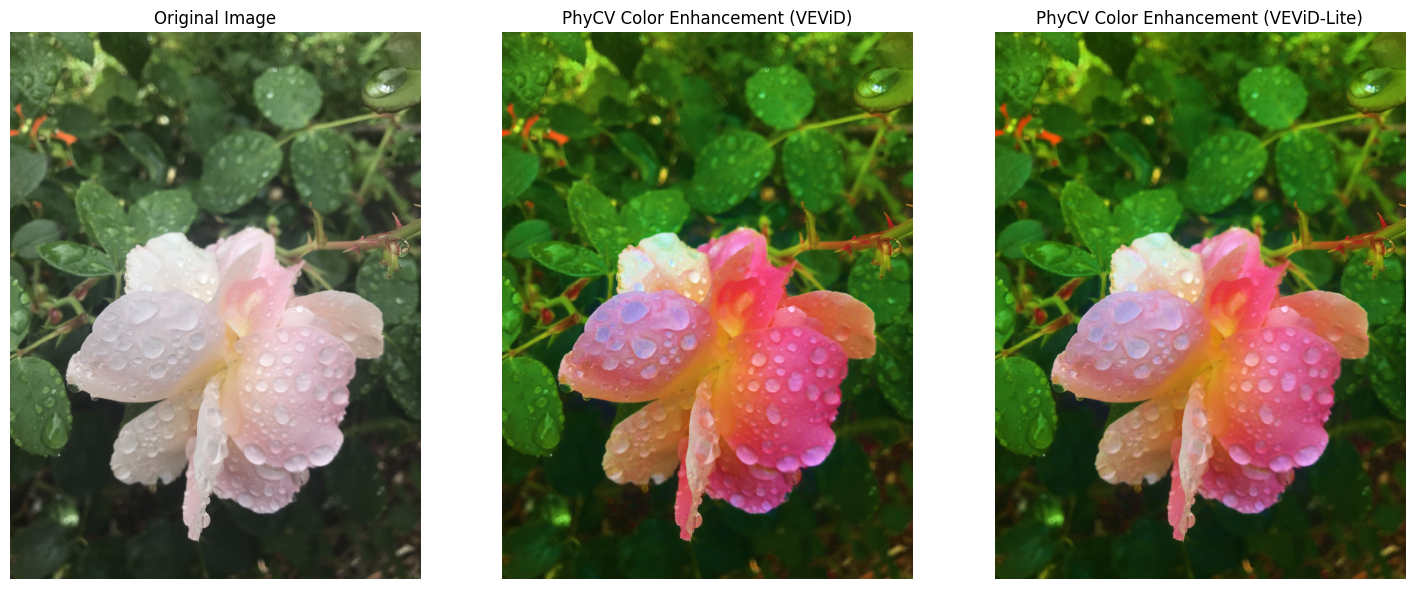

In [ ]:
import os

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import torch

from phycv import VEVID

# you can change this to your own image
img_file = './assets/input_images/flower.png'
original_image = mpimg.imread(img_file)

# VEViD parameters
S = 0.4
T = 0.001
b = 0.25
G = 0.8

# run VEVID
vevid = VEVID()
vevid_output = vevid.run(img_file=img_file, S=S, T=T, b=b, G=G, color=True)

# run VEViD-Lite
vevid_lite_output = vevid.run_lite(img_file=img_file, b=b, G=G, color=True)

# visualize the results
f, axes = plt.subplots(1, 3, figsize=(18, 8))
axes[0].imshow(original_image)
axes[0].axis("off")
axes[0].set_title("Original Image")
axes[1].imshow(vevid_output)
axes[1].axis("off")
axes[1].set_title("PhyCV Color Enhancement (VEViD)")
axes[2].imshow(vevid_lite_output)
axes[2].axis("off")
axes[2].set_title("PhyCV Color Enhancement (VEViD-Lite)")

## VEViD for Video Enhancement

In [ ]:
# switch to GPU runtime for acceleration
import os

import imageio.v3 as iio
import numpy as np
import torch
import torchvision

from phycv import VEVID_GPU

# you can change this to your own video
vid = torchvision.io.read_video("./assets/input_videos/video_building.mp4")
print("video loaded!")

output_path = "./output/"
if not os.path.exists(output_path):
    os.makedirs(output_path)

# get how many frames are in the video
# create a empty array to store the VEViD output
vid_frames = vid[0]
length = vid_frames.shape[0]
frame_h = vid_frames[0].shape[0]
frame_w = vid_frames[0].shape[1]
vevid_out_vid = np.zeros((length, 3, frame_h, frame_w))

# indicate VEViD parameters
S = 0.4
T = 0.001
b = 0.25
G = 0.8
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# run VEViD for each frame
for i in range(length):
    frame = torch.permute(vid_frames[i], (2, 0, 1)) / 255.0
    frame = frame.to(device)
    # if it is the first frame, we have to initialized the kernel
    if i == 0:
        vevid = VEVID_GPU(device=device)
        vevid.load_img(img_array=frame)
        vevid.init_kernel(S, T)
        vevid.apply_kernel(b, G)
    # for rest of the frames, directly use the initialized kernel
    else:
        vevid.load_img(img_array=frame)
        vevid.apply_kernel(b, G)
    # save output into the array
    vevid_out_vid[i] = vevid.vevid_output.cpu().numpy()

print("create video...")
# save the results for each frame
concat_frames = []
for i in range(length):
    raw_frame = vid_frames[i].numpy()
    vevid_frame = (np.transpose(vevid_out_vid[i], (1, 2, 0)) * 255).astype(np.uint8)
    concat_frame = np.concatenate((raw_frame, vevid_frame), 1)
    concat_frames.append(concat_frame)

# create video from the processed frames
iio.imwrite("./output/VEViD_video_demo.mp4", concat_frames, fps=20)

/usr/local/lib/python3.10/dist-packages/torchvision/io/video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


video loaded!
create video...


## PST for Edge Detection

Text(0.5, 1.0, 'PhyCV Edge Detection')

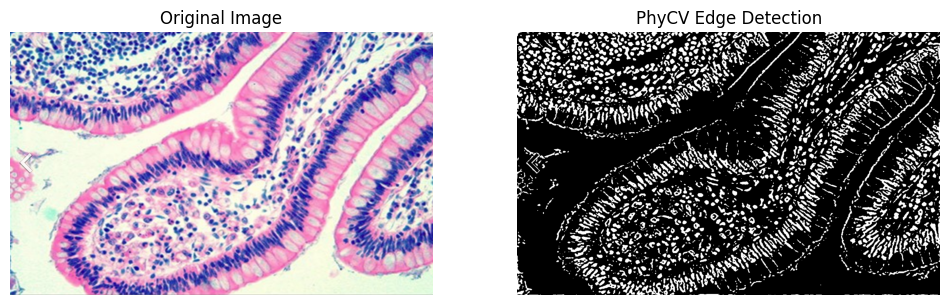

In [ ]:
import os

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import torch

from phycv import PST

# you can change this to your own image
img_file = "./assets/input_images/cell.png"
original_image = mpimg.imread(img_file)

# PST parameters
S = 0.4
W = 20
sigma_LPF = 0.1
thresh_min = 0.0
thresh_max = 0.8
morph_flag = 1

# run PST version
pst = PST()
pst_output = pst.run(img_file, S, W, sigma_LPF, thresh_min, thresh_max, morph_flag)

f, axes = plt.subplots(1, 2, figsize=(12, 8))
axes[0].imshow(original_image)
axes[0].axis("off")
axes[0].set_title("Original Image")
axes[1].imshow(pst_output, cmap="gray")
axes[1].axis("off")
axes[1].set_title("PhyCV Edge Detection")

## PAGE for Directional Edge Detection

Text(0.5, 1.0, 'PhyCV Directional Edge Detection')

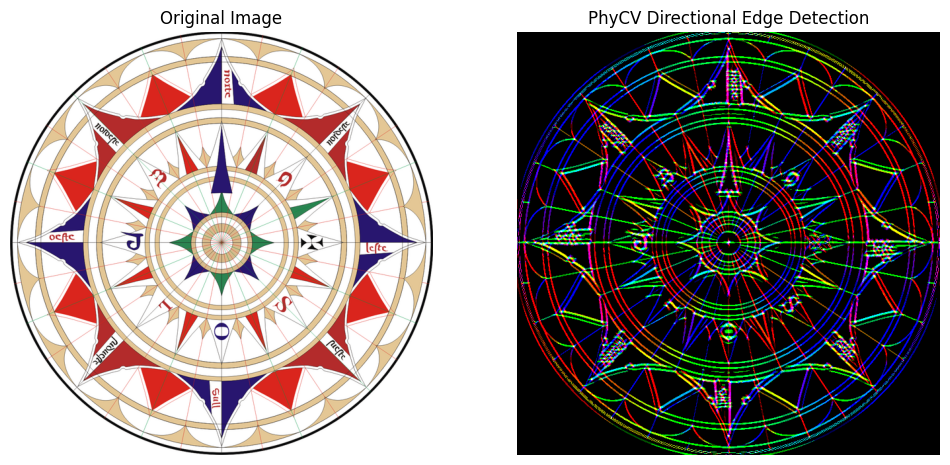

In [ ]:
import os

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import torch

from phycv import PAGE

# you can change this to your own image
img_file = "./assets/input_images/wind_rose.png"
original_image = mpimg.imread(img_file)

# PAGE parameters
direction_bins=10
mu_1 = 0
mu_2 = 0.35
sigma_1 = 0.05
sigma_2 = 0.8
S1 = 0.8
S2 = 0.8
sigma_LPF = 0.1
thresh_min=0.0
thresh_max=0.9
morph_flag = 1

# run PAGE GPU version
page = PAGE(direction_bins=10)
page_output = page.run(img_file, mu_1, mu_2, sigma_1, sigma_2, S1, S2, sigma_LPF, thresh_min, thresh_max, morph_flag)

f, axes = plt.subplots(1, 2, figsize=(12, 8))
axes[0].imshow(original_image)
axes[0].axis("off")
axes[0].set_title("Original Image")
axes[1].imshow(page_output)
axes[1].axis("off")
axes[1].set_title("PhyCV Directional Edge Detection")